In [4]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import csv

path="Animals/puppy.jpg"
pictures=path
model = ResNet50(weights='imagenet') #accessing data set
img = image.load_img(pictures, target_size=(224, 224))#reszie image
x = image.img_to_array(img)# array conversion
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)#predict
#print('Predicted:', decode_predictions(preds, top=1)[0])
rzt=decode_predictions(preds, top=1)[0]
print(rzt)
f=open("result.csv","r+",newline="")
writer=csv.writer(f)
writer.writerows(rzt)
f.close()
#print(type(rzt))

1/1 [==============================] - 2s 2s/step
[('n02099712', 'Labrador_retriever', 0.76720244)]


In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import csv

path = "Animals/puppy.jpg"
pictures = path
model = ResNet50(weights='imagenet')  # Load pre-trained ResNet50 model
img = image.load_img(pictures, target_size=(224, 224))  # Resize image
x = image.img_to_array(img)  # Convert image to array
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)  # Predict

# Decode the predictions
decoded_preds = decode_predictions(preds, top=1)[0]

# Extract species names and corresponding accuracies
species_names = [pred[1].replace('_', ' ') for pred in decoded_preds]
accuracies = [pred[2] for pred in decoded_preds]

# Save the results in CSV with separate columns for species names and accuracies
with open("result.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Species Name", "Accuracy"])
    for species_name, accuracy in zip(species_names, accuracies):
        writer.writerow([species_name, accuracy])


1/1 [==============================] - 2s 2s/step


In [6]:
import cv2
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# Function to predict the species and accuracy
def predict_species(img):
    model = ResNet50(weights='imagenet')
    x = preprocess_input(img)
    preds = model.predict(x)
    decoded_preds = decode_predictions(preds, top=1)[0]
    species_name = decoded_preds[0][1].replace('_', ' ')
    accuracy = decoded_preds[0][2]
    return species_name, accuracy

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Open the video file
video_file = "Animals/video1.mp4.mp4"  # Replace with the path to your video
cap = cv2.VideoCapture(video_file)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to RGB (required for prediction)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = image.array_to_img(frame_rgb)
    img = img.resize((224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    # Predict species and accuracy
    species_name, accuracy = predict_species(img)

    # Display the species prediction on the frame
    frame = cv2.putText(frame, f"Species: {species_name}", (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Video", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


In [14]:




from sklearn.metrics import precision_score, recall_score, f1_score


y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]

precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.8
Recall: 0.8
F1 Score: 0.8



[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 7.8/7.8 MB 269.3 kB/s eta 0:00:00
     -------------------------------------- 294.9/294.9 kB 8.9 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 6.7 MB/s eta 0:00:00
     -------------------------------------- 218.6/218.6 kB 6.5 MB/s eta 0:00:00
     -------------------------------------- 106.9/106.9 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 55.9/55.9 kB ? eta 0:00:00


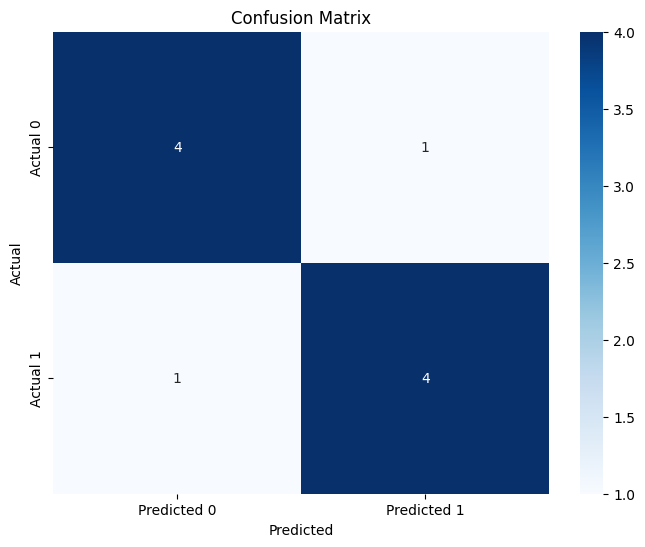

In [17]:
%pip install matplotlib seaborn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Your true and predicted labels
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()